# NBA Data Set

Does the data say that LeBron James matters?

Objective: Find statistical support for difference makers in the NBA.
- Null hypothesis = every one is the same

# Load Packages

In [98]:
import numpy as np
import pandas as pd

# from sklearn.preprocessing import LabelEncoder
# from scipy.signal import correlate

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from imblearn.over_sampling import SMOTE

import seaborn as sns

import scipy.stats as st

# Load Data

In [99]:
df1 = pd.read_csv('nba_games_2013_2015.csv',sep=';')
df2 = pd.read_csv('nba_playoff_games_2016.csv',sep=';')

In [100]:
df1.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME   GAME_ID  \
0      22015  1610612750               MIN  Minnesota Timberwolves  21501226   
1      22015  1610612749               MIL         Milwaukee Bucks  21501225   
2      22015  1610612738               BOS          Boston Celtics  21501217   
3      22015  1610612747               LAL      Los Angeles Lakers  21501228   
4      22015  1610612739               CLE     Cleveland Cavaliers  21501220   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2016-04-13  MIN vs. NOP  W  240  144  ...   0.826     5    38   43   41   
1  2016-04-13  MIL vs. IND  L  240   92  ...   0.846     7    36   43   23   
2  2016-04-13  BOS vs. MIA  W  240   98  ...   0.864    10    29   39   20   
3  2016-04-13  LAL vs. UTA  W  239  101  ...   0.867     8    39   47   19   
4  2016-04-13  CLE vs. DET  L  265  110  ...   0.733     8    35   43   21   

   STL  BLK  TOV  PF  PLUS_MINUS  
0   14    8   13  20        35.0  
1    8    3   15  15        -5.0  
2    7    3    7  20        10.0  
3    6    3   13  17         5.0  
4    4    7   10  23        -2.0  

[5 rows x 28 columns]

In [101]:
df2.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME   GAME_ID  \
0      42015  1610612739               CLE    Cleveland Cavaliers  41500407   
1      42015  1610612744               GSW  Golden State Warriors  41500407   
2      42015  1610612744               GSW  Golden State Warriors  41500406   
3      42015  1610612739               CLE    Cleveland Cavaliers  41500406   
4      42015  1610612739               CLE    Cleveland Cavaliers  41500405   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2016-06-19    CLE @ GSW  W  241   93  ...   0.840     9    39   48   17   
1  2016-06-19  GSW vs. CLE  L  239   89  ...   0.769     7    32   39   22   
2  2016-06-16    GSW @ CLE  L  238  101  ...   0.690     9    26   35   19   
3  2016-06-16  CLE vs. GSW  W  240  115  ...   0.781     8    37   45   24   
4  2016-06-13    CLE @ GSW  W  241  112  ...   0.609     8    33   41   15   

   STL  BLK  TOV  PF  PLUS_MINUS  
0    7    6   11  15         4.0  
1    7    5   10  23        -4.0  
2    5    3   14  25       -14.0  
3   12    7   10  25        14.0  
4   11    9   16  22        15.0  

[5 rows x 28 columns]

## Join Tables

In [102]:
frames = [df1, df2]
df = pd.concat(frames)
df.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME   GAME_ID  \
0      22015  1610612750               MIN  Minnesota Timberwolves  21501226   
1      22015  1610612749               MIL         Milwaukee Bucks  21501225   
2      22015  1610612738               BOS          Boston Celtics  21501217   
3      22015  1610612747               LAL      Los Angeles Lakers  21501228   
4      22015  1610612739               CLE     Cleveland Cavaliers  21501220   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0  2016-04-13  MIN vs. NOP  W  240  144  ...   0.826     5    38   43   41   
1  2016-04-13  MIL vs. IND  L  240   92  ...   0.846     7    36   43   23   
2  2016-04-13  BOS vs. MIA  W  240   98  ...   0.864    10    29   39   20   
3  2016-04-13  LAL vs. UTA  W  239  101  ...   0.867     8    39   47   19   
4  2016-04-13  CLE vs. DET  L  265  110  ...   0.733     8    35   43   21   

   STL  BLK  TOV  PF  PLUS_MINUS  
0   14    8   13  20        35.0  
1    8    3   15  15        -5.0  
2    7    3    7  20        10.0  
3    6    3   13  17         5.0  
4    4    7   10  23        -2.0  

[5 rows x 28 columns]

# Data Cleaning

In [103]:
df.isnull().any()

SEASON_ID            False
TEAM_ID              False
TEAM_ABBREVIATION    False
TEAM_NAME            False
GAME_ID              False
GAME_DATE            False
MATCHUP              False
WL                   False
MIN                  False
PTS                  False
FGM                  False
FGA                  False
FG_PCT               False
FG3M                 False
FG3A                 False
FG3_PCT              False
FTM                  False
FTA                  False
FT_PCT               False
OREB                 False
DREB                 False
REB                  False
AST                  False
STL                  False
BLK                  False
TOV                  False
PF                   False
PLUS_MINUS           False
dtype: bool

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7552 entries, 0 to 171
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          7552 non-null   int64  
 1   TEAM_ID            7552 non-null   int64  
 2   TEAM_ABBREVIATION  7552 non-null   object 
 3   TEAM_NAME          7552 non-null   object 
 4   GAME_ID            7552 non-null   int64  
 5   GAME_DATE          7552 non-null   object 
 6   MATCHUP            7552 non-null   object 
 7   WL                 7552 non-null   object 
 8   MIN                7552 non-null   int64  
 9   PTS                7552 non-null   int64  
 10  FGM                7552 non-null   int64  
 11  FGA                7552 non-null   int64  
 12  FG_PCT             7552 non-null   float64
 13  FG3M               7552 non-null   int64  
 14  FG3A               7552 non-null   int64  
 15  FG3_PCT            7552 non-null   float64
 16  FTM                7552 n

In [105]:
df.shape

(7552, 28)

## Create sub-DFs per season

The dates are a bit misleading because the season spans 2 calender years. E.g. 2013 season = Oct 2013 - April 2014
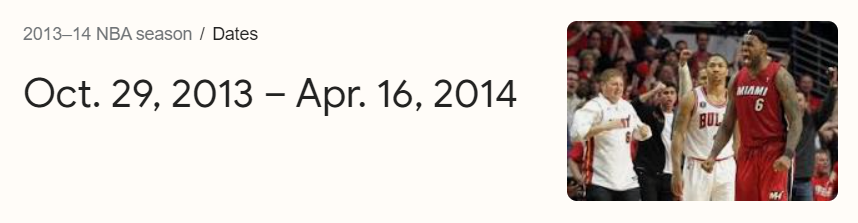
The regular season ended on April 17, 2013, and the playoffs began on April 20, 2013 and ended on June 20, 2013

In [106]:
df.SEASON_ID.unique()

array([22015, 22014, 22013, 42015], dtype=int64)

In [107]:
df_2013 = df[df['SEASON_ID']==22013]
df_2013

SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME   GAME_ID  \
4920      22013  1610612742               DAL    Dallas Mavericks  21301216   
4921      22013  1610612743               DEN      Denver Nuggets  21301230   
4922      22013  1610612762               UTA           Utah Jazz  21301218   
4923      22013  1610612751               BKN       Brooklyn Nets  21301224   
4924      22013  1610612753               ORL       Orlando Magic  21301227   
...         ...         ...               ...                 ...       ...   
7375      22013  1610612753               ORL       Orlando Magic  21300001   
7376      22013  1610612748               MIA          Miami Heat  21300002   
7377      22013  1610612747               LAL  Los Angeles Lakers  21300003   
7378      22013  1610612741               CHI       Chicago Bulls  21300002   
7379      22013  1610612754               IND      Indiana Pacers  21300001   

       GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
4920  2014-04-16    DAL @ MEM  L  265  105  ...   0.818    15    24   39   22   
4921  2014-04-16  DEN vs. GSW  L  241  112  ...   0.829     9    33   42   23   
4922  2014-04-16    UTA @ MIN  W  291  136  ...   0.828    22    38   60   30   
4923  2014-04-16    BKN @ CLE  L  240   85  ...   0.739     6    30   36   21   
4924  2014-04-16  ORL vs. IND  L  240   86  ...   0.708     9    31   40   14   
...          ...          ... ..  ...  ...  ...     ...   ...   ...  ...  ...   
7375  2013-10-29    ORL @ IND  L  241   87  ...   0.600    13    26   39   17   
7376  2013-10-29  MIA vs. CHI  W  239  107  ...   0.759     5    35   40   26   
7377  2013-10-29  LAL vs. LAC  W  240  116  ...   0.643    18    34   52   23   
7378  2013-10-29    CHI @ MIA  L  238   95  ...   0.783    11    30   41   23   
7379  2013-10-29  IND vs. ORL  W  241   97  ...   0.688    10    34   44   17   

      STL  BLK  TOV  PF  PLUS_MINUS  
4920   11    4   13  23        -1.0  
4921    4    4   19  28        -4.0  
4922   10    9   18  34         6.0  
4923    9    1   15  16       -29.0  
4924    9    5   10  16       -15.0  
...   ...  ...  ...  ..         ...  
7375   10    6   17  26       -10.0  
7376   10    7   18  21        12.0  
7377    8    6   19  23        13.0  
7378   11    4   18  27       -12.0  
7379    4   18   20  13        10.0  

[2460 rows x 28 columns]

In [108]:
df_2014 = df[df['SEASON_ID']==22014]
df_2014

SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
2460      22014  1610612760               OKC  Oklahoma City Thunder   
2461      22014  1610612765               DET        Detroit Pistons   
2462      22014  1610612766               CHA      Charlotte Hornets   
2463      22014  1610612737               ATL          Atlanta Hawks   
2464      22014  1610612759               SAS      San Antonio Spurs   
...         ...         ...               ...                    ...   
4915      22014  1610612740               NOP   New Orleans Pelicans   
4916      22014  1610612742               DAL       Dallas Mavericks   
4917      22014  1610612753               ORL          Orlando Magic   
4918      22014  1610612745               HOU        Houston Rockets   
4919      22014  1610612759               SAS      San Antonio Spurs   

       GAME_ID   GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  \
2460  21401222  2015-04-15    OKC @ MIN  W  241  138  ...   0.710    18    28   
2461  21401226  2015-04-15    DET @ NYK  W  240  112  ...   0.741    11    33   
2462  21401228  2015-04-15    CHA @ TOR  L  240   87  ...   0.938     8    28   
2463  21401217  2015-04-15    ATL @ CHI  L  240   85  ...   0.714    10    32   
2464  21401223  2015-04-15    SAS @ NOP  L  238  103  ...   0.769     4    32   
...        ...         ...          ... ..  ...  ...  ...     ...   ...   ...   
4915  21400001  2014-10-28  NOP vs. ORL  W  240  101  ...   0.484    26    36   
4916  21400002  2014-10-28    DAL @ SAS  L  239  100  ...   0.842     9    24   
4917  21400001  2014-10-28    ORL @ NOP  L  239   84  ...   0.762    16    40   
4918  21400003  2014-10-28    HOU @ LAL  W  241  108  ...   0.680    14    33   
4919  21400002  2014-10-28  SAS vs. DAL  W  241  101  ...   0.813     9    29   

      REB  AST  STL  BLK  TOV  PF  PLUS_MINUS  
2460   46   22   10    6   13  25        25.0  
2461   44   20   14    3   12  22        22.0  
2462   36   15    8    3   12  10        -5.0  
2463   42   15   10   10   15  19        -6.0  
2464   36   33    2    3   15  20        -5.0  
...   ...  ...  ...  ...  ...  ..         ...  
4915   62   20   10   17    9  17        17.0  
4916   33   17    9    3   10  20        -1.0  
4917   56   17    5    9   18  25       -17.0  
4918   47   22    7    3   13  30        18.0  
4919   38   23    5    3   20  20         1.0  

[2460 rows x 28 columns]

In [109]:
df_2015 = df[df['SEASON_ID']==22015]
df_2015

SEASON_ID     TEAM_ID TEAM_ABBREVIATION               TEAM_NAME  \
0         22015  1610612750               MIN  Minnesota Timberwolves   
1         22015  1610612749               MIL         Milwaukee Bucks   
2         22015  1610612738               BOS          Boston Celtics   
3         22015  1610612747               LAL      Los Angeles Lakers   
4         22015  1610612739               CLE     Cleveland Cavaliers   
...         ...         ...               ...                     ...   
2455      22015  1610612744               GSW   Golden State Warriors   
2456      22015  1610612739               CLE     Cleveland Cavaliers   
2457      22015  1610612740               NOP    New Orleans Pelicans   
2458      22015  1610612741               CHI           Chicago Bulls   
2459      22015  1610612737               ATL           Atlanta Hawks   

       GAME_ID   GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  \
0     21501226  2016-04-13  MIN vs. NOP  W  240  144  ...   0.826     5    38   
1     21501225  2016-04-13  MIL vs. IND  L  240   92  ...   0.846     7    36   
2     21501217  2016-04-13  BOS vs. MIA  W  240   98  ...   0.864    10    29   
3     21501228  2016-04-13  LAL vs. UTA  W  239  101  ...   0.867     8    39   
4     21501220  2016-04-13  CLE vs. DET  L  265  110  ...   0.733     8    35   
...        ...         ...          ... ..  ...  ...  ...     ...   ...   ...   
2455  21500003  2015-10-27  GSW vs. NOP  W  241  111  ...   0.909    21    35   
2456  21500002  2015-10-27    CLE @ CHI  L  240   95  ...   0.588    11    39   
2457  21500003  2015-10-27    NOP @ GSW  L  241   95  ...   0.704     8    25   
2458  21500002  2015-10-27  CHI vs. CLE  W  240   97  ...   0.696     7    40   
2459  21500001  2015-10-27  ATL vs. DET  L  239   94  ...   0.800     7    33   

      REB  AST  STL  BLK  TOV  PF  PLUS_MINUS  
0      43   41   14    8   13  20        35.0  
1      43   23    8    3   15  15        -5.0  
2      39   20    7    3    7  20        10.0  
3      47   19    6    3   13  17         5.0  
4      43   21    4    7   10  23        -2.0  
...   ...  ...  ...  ...  ...  ..         ...  
2455   56   29    8    7   20  29        16.0  
2456   50   26    5    7   10  21        -2.0  
2457   33   21    9    3   18  26       -16.0  
2458   47   13    6   10   13  22         2.0  
2459   40   22    9    4   15  25       -12.0  

[2460 rows x 28 columns]

In [110]:
df_2015PO = df[df['SEASON_ID']==42015]
df_2015PO

SEASON_ID     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME   GAME_ID  \
0        42015  1610612739               CLE    Cleveland Cavaliers  41500407   
1        42015  1610612744               GSW  Golden State Warriors  41500407   
2        42015  1610612744               GSW  Golden State Warriors  41500406   
3        42015  1610612739               CLE    Cleveland Cavaliers  41500406   
4        42015  1610612739               CLE    Cleveland Cavaliers  41500405   
..         ...         ...               ...                    ...       ...   
167      42015  1610612760               OKC  Oklahoma City Thunder  41500161   
168      42015  1610612737               ATL          Atlanta Hawks  41500131   
169      42015  1610612745               HOU        Houston Rockets  41500141   
170      42015  1610612742               DAL       Dallas Mavericks  41500161   
171      42015  1610612738               BOS         Boston Celtics  41500131   

      GAME_DATE      MATCHUP WL  MIN  PTS  ...  FT_PCT  OREB  DREB  REB  AST  \
0    2016-06-19    CLE @ GSW  W  241   93  ...   0.840     9    39   48   17   
1    2016-06-19  GSW vs. CLE  L  239   89  ...   0.769     7    32   39   22   
2    2016-06-16    GSW @ CLE  L  238  101  ...   0.690     9    26   35   19   
3    2016-06-16  CLE vs. GSW  W  240  115  ...   0.781     8    37   45   24   
4    2016-06-13    CLE @ GSW  W  241  112  ...   0.609     8    33   41   15   
..          ...          ... ..  ...  ...  ...     ...   ...   ...  ...  ...   
167  2016-04-16  OKC vs. DAL  W  243  108  ...   0.857    14    42   56   23   
168  2016-04-16  ATL vs. BOS  W  238  102  ...   0.771    13    40   53   23   
169  2016-04-16    HOU @ GSW  L  240   78  ...   0.500    13    38   51   16   
170  2016-04-16    DAL @ OKC  L  238   70  ...   0.615     9    24   33   16   
171  2016-04-16    BOS @ ATL  L  239  101  ...   0.842    15    35   50   27   

     STL  BLK  TOV  PF  PLUS_MINUS  
0      7    6   11  15         4.0  
1      7    5   10  23        -4.0  
2      5    3   14  25       -14.0  
3     12    7   10  25        14.0  
4     11    9   16  22        15.0  
..   ...  ...  ...  ..         ...  
167    7    6   18  25        38.0  
168    4    9   11  20         1.0  
169   10    6   24  28       -26.0  
170    5    0   12  25       -38.0  
171    6    6   10  32        -1.0  

[172 rows x 28 columns]

## Data Exploration

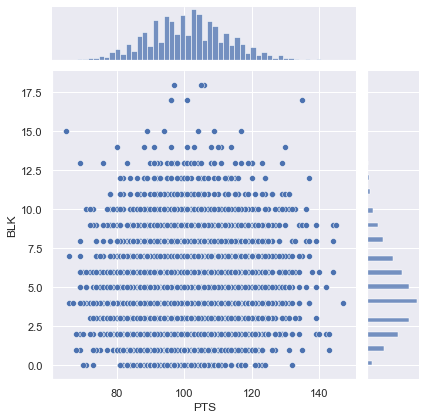

In [111]:
sns.set(rc={'figure.figsize':(50,50)})
sns.jointplot(x='PTS', y='BLK', data=df)

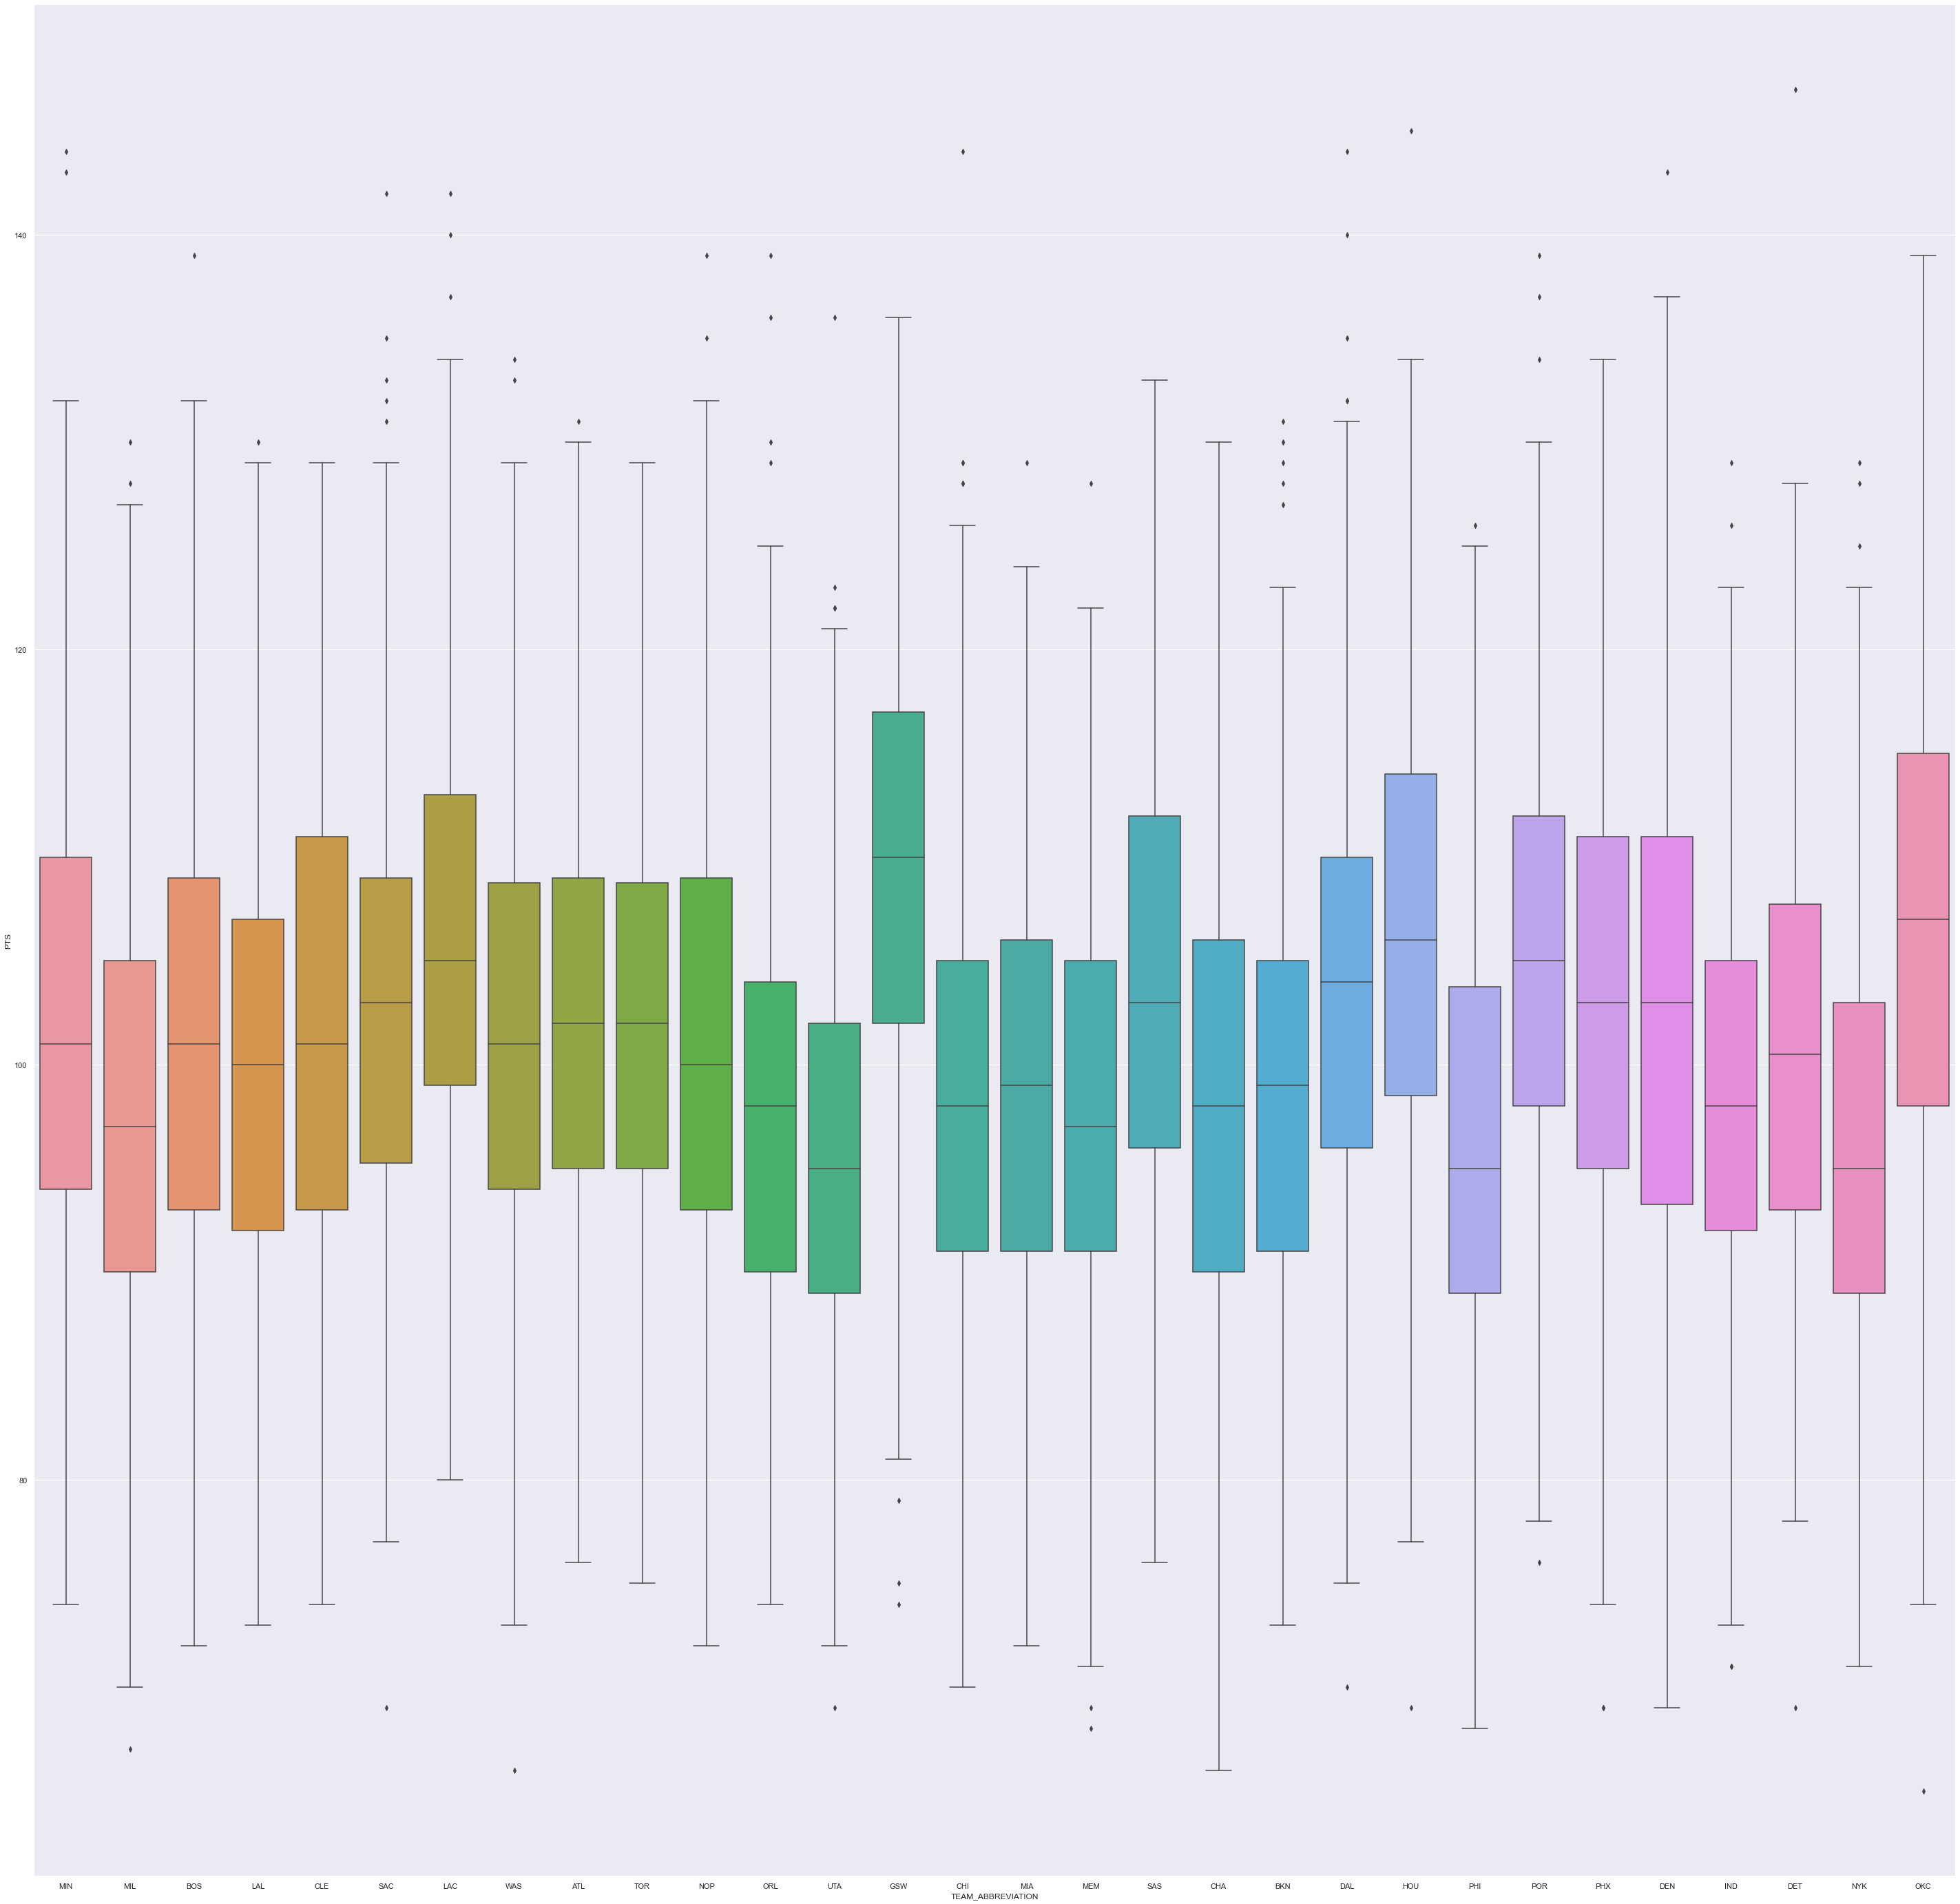

In [112]:
sns.boxplot(x='TEAM_ABBREVIATION', y='PTS', data=df)
sns.set(rc={'figure.figsize':(10,10)})

Text(0.5, 1.0, 'NBA Correlation')

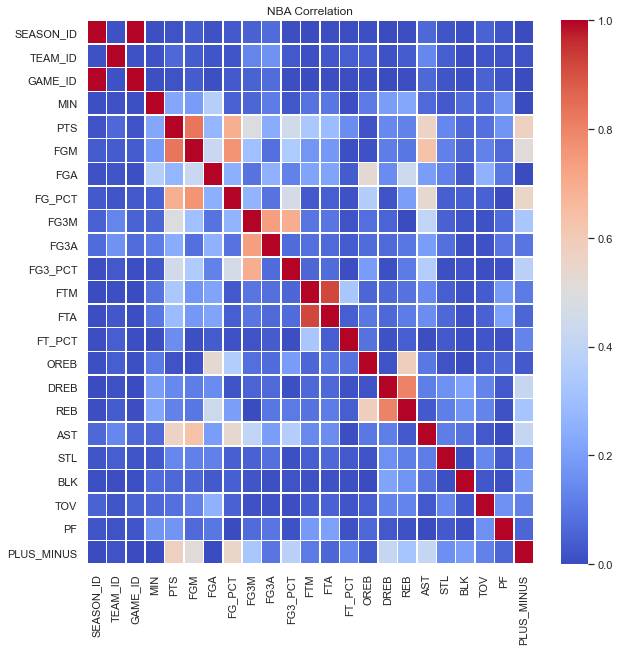

In [113]:
sns.heatmap(abs(df.corr()), cmap='coolwarm',linewidths=.5,vmin = 0,vmax=1,annot=False)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('NBA Correlation')

# Setting Up the Problem Statement

Does the data support the common assertion that LeBron James is a difference maker?

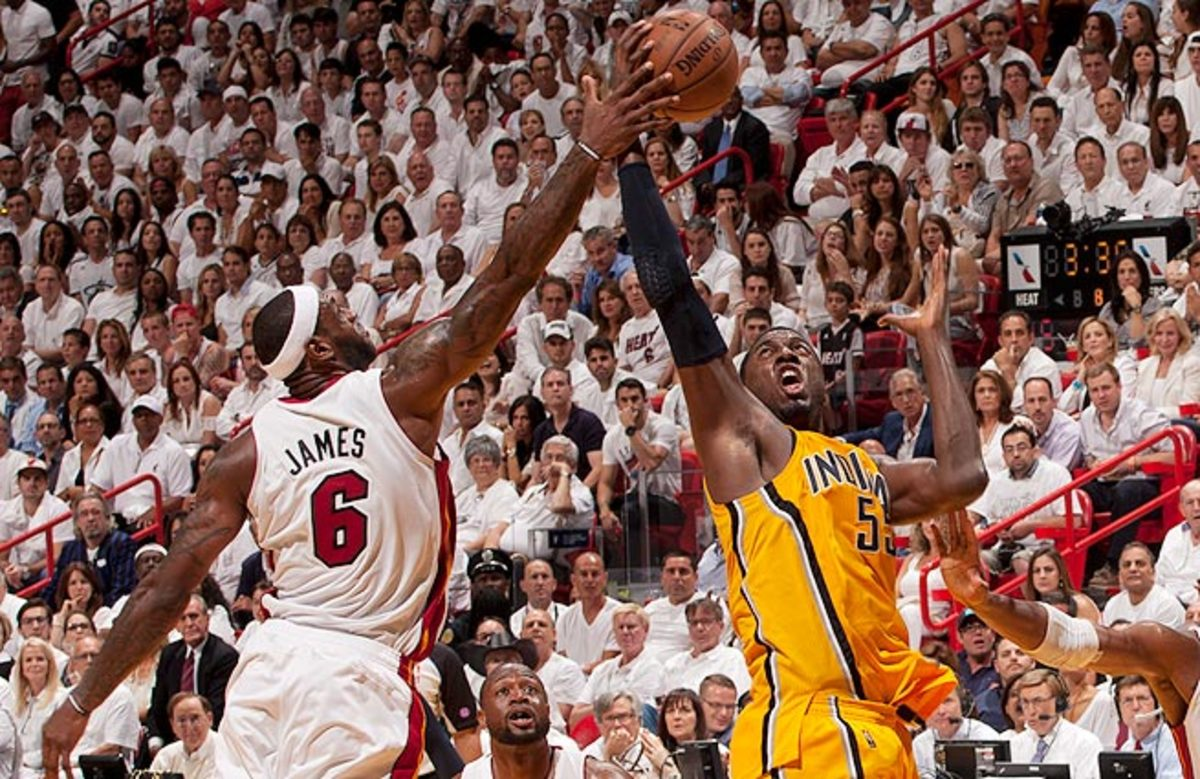
* Disclaimer - this is a tongue-in-cheek question because you KNOW he is the MVP; what is interesting though is that this helps us set up the workflow to expand this analysis to less clear areas of sport

# Analysis

### Test, if the hypothesis that offensive production of Cleveland Cavaliers and Golden State Warriors (teams from finals) was distributed equally in 2015/2016

Do two separate tests for PTS (Points) and FG_PCT (Field Goal Percentage)

In basketball, a field goal is a basket scored on any shot or tap other than a free throw, worth two or three points depending on the distance of the attempt from the basket. 

The better the player's skills then the higher their field goal percentage will be. A player with good shooting skills usually averages about 40% from the field. The term “field” or “the basketball field” refers to the court, hence the name field goal.

In [114]:
# Null hypotheis, Cavs points and GSW points are equally distributed during the regular season

Cavs = df_2015[df_2015.TEAM_NAME=='Cleveland Cavaliers'].PTS.values
GSW = df_2015[df_2015.TEAM_NAME=='Golden State Warriors'].PTS.values


ttest,pval = st.ttest_ind(Cavs,GSW)

print(pval)

if pval <0.05:
  print("We reject the null hypothesis")
else:
  print("We accept the null hypothesis")

1.4233420547764935e-08
We reject the null hypothesis


In [115]:
# Null hypotheis, Cavs points and GSW Field Goal Percentages are equally distributed during the regular season

Cavs = df_2015[df_2015.TEAM_NAME=='Cleveland Cavaliers'].FG_PCT.values
GSW = df_2015[df_2015.TEAM_NAME=='Golden State Warriors'].FG_PCT.values


ttest,pval = st.ttest_ind(Cavs,GSW)

print(pval)

if pval <0.05:
  print("We reject the null hypothesis")
else:
  print("We accept the null hypothesis")

0.00206097581047554
We reject the null hypothesis


### Test the hypothesis that points per game (PTS) are equally distributed in all 3 seasons for Cleveland
One-way ANOVA is a hypothesis test to compare more than 2 distributions

In [116]:
Cavs_2013 = df_2013[df_2013.TEAM_NAME=='Cleveland Cavaliers'].PTS.values
Cavs_2014 = df_2014[df_2014.TEAM_NAME=='Cleveland Cavaliers'].PTS.values
Cavs_2015 = df_2015[df_2015.TEAM_NAME=='Cleveland Cavaliers'].PTS.values

stat, pval = st.f_oneway(Cavs_2013,Cavs_2014,Cavs_2015)

print("F statistic:",stat,"p-value from the F distribution:", pval)
if pval > 0.05:
    print("There were no statistically significant differences between group means as determined by one-way ANOVA")
else:
    print("There were statistically significant differences between group means as determined by one-way ANOVA")

F statistic: 5.9200250318080885 p-value from the F distribution: 0.003087727119983984
There were statistically significant differences between group means as determined by one-way ANOVA


LeBron James was on the Caveliers for the 2014-2015 and 2015-2016 seasons (in this dataset)

#### Between which seasons, we can see the significant difference?

In [117]:
# Null hypothesis that 2013 and 2014 were equally distributed

ttest,pval = st.ttest_ind(Cavs_2013,Cavs_2014)

print(pval)

if pval <0.05:
  print("We reject the null hypothesis")
else:
  print("We accept the null hypothesis")

0.013091680534336523
We reject the null hypothesis


- Perhaps LeBron re-joining in 2014 made a difference?

In [118]:
# Null hypothesis that 2014 and 2015 were equally distributed

ttest,pval = st.ttest_ind(Cavs_2014,Cavs_2015)

print(pval)

if pval <0.05:
  print("We reject the null hypothesis")
else:
  print("We accept the null hypothesis")

0.5203507617734474
We accept the null hypothesis


- Perhaps the fact that in 2014 and 2015, when LeBron was there for both seasons, and that they were consistent (i.e. equally distributed) supports that he helped cause that?

# Conclusion

Performing a simple statistical analysis on the Cavalier's performance with and without LeBron James seems to suggest that he did indeed matter

# Bonus

### What about the removal of Coach Blatt on 24th of Jan, 2016?
Cleveland was coached by Blatt in seasons 2014/2015 and 2015/2016

In [119]:
df_2015['GAME_DATE']=pd.to_datetime(df_2015['GAME_DATE'])
team1_15 = df_2015[df_2015.TEAM_NAME=='Cleveland Cavaliers']

# take all of 2014 season points
team1_14 = df_2014[df_2014.TEAM_NAME=='Cleveland Cavaliers'].PTS.values

#take 2015 season before Jan 25, 2016 
team1_15_before = df_2015[(df_2015['GAME_DATE'] < pd.to_datetime('2016-01-25'))].PTS.values

#PTS after Jan 25, 2016
blatt_no = team1_15[(team1_15['GAME_DATE'] >= pd.to_datetime('2016-01-25')) & (team1_15['GAME_DATE'] <= pd.to_datetime('2016-04-13'))].PTS.values

# dataset where Blatt was coaching
blatt_yes = np.concatenate((team1_14, team1_15_before))

C:\Users\stace\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post hoc comparisons between groups are required to determine which groups are different.

In [120]:
# Null hypothesis is there the team was the same regardless of who was the coach

statistic,pvalue = st.kruskal(blatt_yes,blatt_no)
if pvalue <0.05:
  print("We reject the null hypothesis")
else:
  print("We accept the null hypothesis")

We reject the null hypothesis


Coaches appear to matter too